<a href="https://colab.research.google.com/github/Mifekmk/SkillTreePython-DataAnalysis/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights -O yolov3.weights

--2022-06-22 10:08:31--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  73.0MB/s    in 3.5s    

2022-06-22 10:08:35 (68.4 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [3]:
! git clone https://github.com/yebiny/SkillTreePython-DeepLearning

Cloning into 'SkillTreePython-DeepLearning'...
remote: Enumerating objects: 208, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 208 (delta 54), reused 68 (delta 39), pack-reused 119
Receiving objects: 100% (208/208), 20.78 MiB | 22.73 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [4]:
import sys
sys.path.append('/content/SkillTreePython-DeepLearning/00.추가학습/data')

In [5]:
from detect_with_yolo import *
import cv2

In [6]:
# opencv를 통해서 가져오는 방법
weight_file= '/content/yolov3.weights'
cfg_file = '/content/SkillTreePython-DeepLearning/00.추가학습/data/yolov3.cfg'
name_file = '/content/SkillTreePython-DeepLearning/00.추가학습/data/coco.names'
model, predict_layer_names = set_model(weight_file, cfg_file) # net
class_names, class_colors = set_label(name_file)

In [7]:
with open(name_file, 'r') as f:
    class_names = []
    for line in f.readlines():
        #print(line.strip()) # .strip()은 줄바꿈이 없음
        class_names.append(line.strip()) # line.strip() : /n 제거
print(len(class_names), class_names)

80 ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
mn, mx = 0, 255
size = (len(class_names), 3)
colors = np.random.uniform(mn, mx, size=size) # 모든 값에서 값은 확률
#colors = np.array(colors, dtype=np.uint8)
print(colors.shape, colors)

(80, 3) [[ 56.73139867 236.69476813 150.83042722]
 [ 44.00365283 199.97803318  35.92706318]
 [ 28.98357284 244.67151193 252.38677502]
 [ 25.27783291  90.00851389 236.1620786 ]
 [144.75880135  94.25818059  81.65550344]
 [ 53.61051722  53.54468509  95.30424681]
 [174.24791007 201.93378359 167.55742545]
 [222.45696219  23.93660115 157.13285492]
 [ 74.12217255 202.43356163 225.88420067]
 [ 84.35864328 161.09014979 121.88391884]
 [222.4321062  239.42603215 226.16868654]
 [ 80.2014492  231.50517688 128.72281463]
 [ 78.50212228 203.56232088  44.90496182]
 [ 35.09833386 248.24165305  96.90846479]
 [135.53726161  76.18780366  40.93354191]
 [245.53728023 252.89608864 252.0960844 ]
 [100.18973507 106.76408463 201.36626674]
 [132.38745295   2.47155513  83.52150335]
 [ 14.86925532 125.43184331  88.29123048]
 [181.01766441  17.7203778  126.67191404]
 [ 76.64022142 146.46921086 172.413767  ]
 [231.92992124 224.10730961  14.75136107]
 [247.22962329  42.16414181 155.28696106]
 [ 10.76631185 149.6983580

700 1050 3


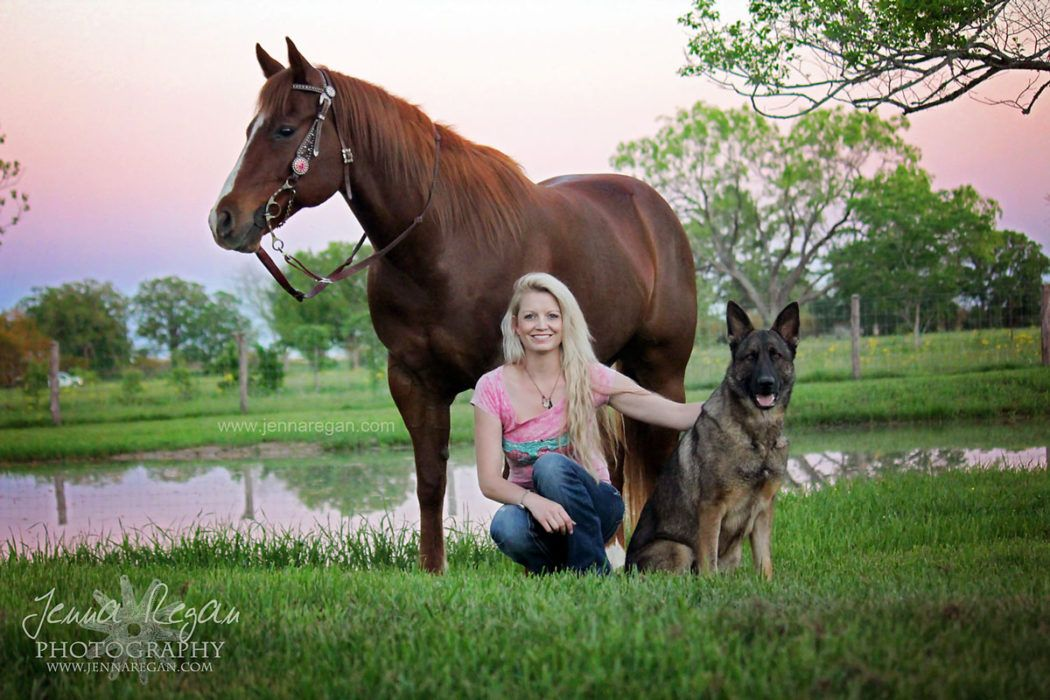

In [10]:
# 이미지 불러오기
f_path = '/content/SkillTreePython-DeepLearning/00.추가학습/data/withanimals.jpg'
img = cv2.imread(f_path)
img_h, img_w, img_c = img.shape
print(img_h, img_w, img_c)
cv2_imshow(img)

In [11]:
# 딥러닝에서 모델 : 연속된 함수 (레이어)
layer_indexes = model.getUnconnectedOutLayers()
for idx in layer_indexes:
  print(idx[0]) #out_layers :  예측을 수행하는 레이어의 인덱스


layer_names = model.getLayerNames() # layer_names : 254개의 레이어의 이름
print(len(layer_names), layer_names)

print(f'첫번째 prediction 레이어: {layer_names[layer_indexes[0][0]-1]}')
print(f'두번째 prediction 레이어: {layer_names[layer_indexes[1][0]-1]}')
print(f'세번째 prediction 레이어: {layer_names[layer_indexes[2][0]-1]}')

200
227
254
254 ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 'relu_37', 'conv_3

In [12]:
# 이미지 전처리
# BGR -> RGB 로 바꾸기위해서 True
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop=False)  # scale: 1/255 하면 소수점이 많아져서 반올림하면 대략 0.00392
model.setInput(blob)

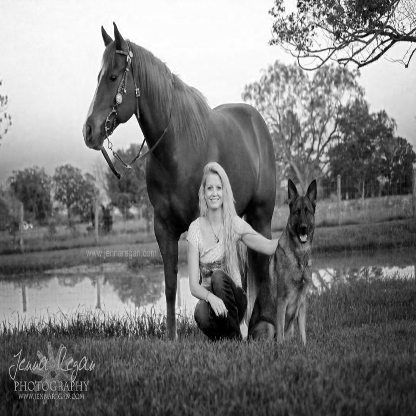

In [13]:
cv2_imshow(blob[0][0]*255)

In [14]:
# 계산(순전파)  forward하면 계산 결과가 나옴
preds = model.forward(['yolo_82', 'yolo_94', 'yolo_106'])
print(preds)

[array([[0.03279332, 0.0428326 , 0.2707215 , ..., 0.        , 0.        ,
        0.        ],
       [0.05029015, 0.0370707 , 0.23321554, ..., 0.        , 0.        ,
        0.        ],
       [0.0513605 , 0.03686801, 0.82344425, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9600302 , 0.9404577 , 0.30059206, ..., 0.        , 0.        ,
        0.        ],
       [0.961645  , 0.96249485, 0.29338187, ..., 0.        , 0.        ,
        0.        ],
       [0.97423786, 0.9515813 , 0.83548045, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02125505, 0.02039629, 0.05848714, ..., 0.        , 0.        ,
        0.        ],
       [0.01469637, 0.02197722, 0.29831868, ..., 0.        , 0.        ,
        0.        ],
       [0.02103194, 0.01865967, 0.07811729, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9756583 , 0.9797074 , 0.04333287, ..., 0.        , 0.        ,
        0.        ],
       [0.9841932 

In [15]:
for pred in preds:
  print(pred.shape)

(507, 85)
(2028, 85)
(8112, 85)


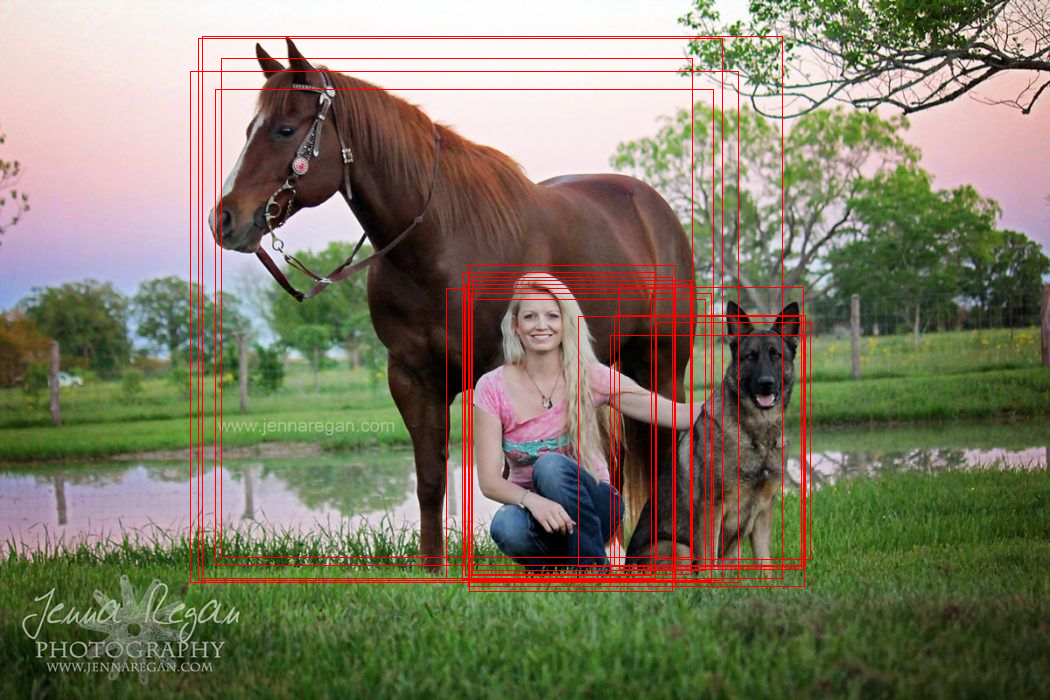

19 19 19


In [16]:

img = cv2.imread(f_path)
img_h, img_w, img_c = img.shape

boxes = []
confidences = []
class_ids = []

for pred in preds:
  #print(pred.shape)
  for v in pred:
    # box : 모델이 예측한 값
    box = v[:4]
    # confidence : 자신감
    confidence = v[4]
    # class_id : 클래스
    class_id = v[5:] # 80 개 배열
    class_id = np.argmax(class_id)

    # confidence 가 0.5 이상일 때
    if confidence > 0.5:
      # 좌표 비율 -> 실제 좌표
      x_center, y_center, w, h = box
      x_center, w= int(x_center*img_w), int(w*img_w)
      y_center, h= int(y_center*img_h), int(h*img_h)
      x, y = x_center-int(w/2), y_center-int(h/2)
      cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 1)

      #confidence가 0.5 이상일 때의
      # 좌표 (x,y,w,h)
      # 클래스 아이디
      # confidence
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)


cv2_imshow(img)
print(len(boxes), len(confidences), len(class_ids))

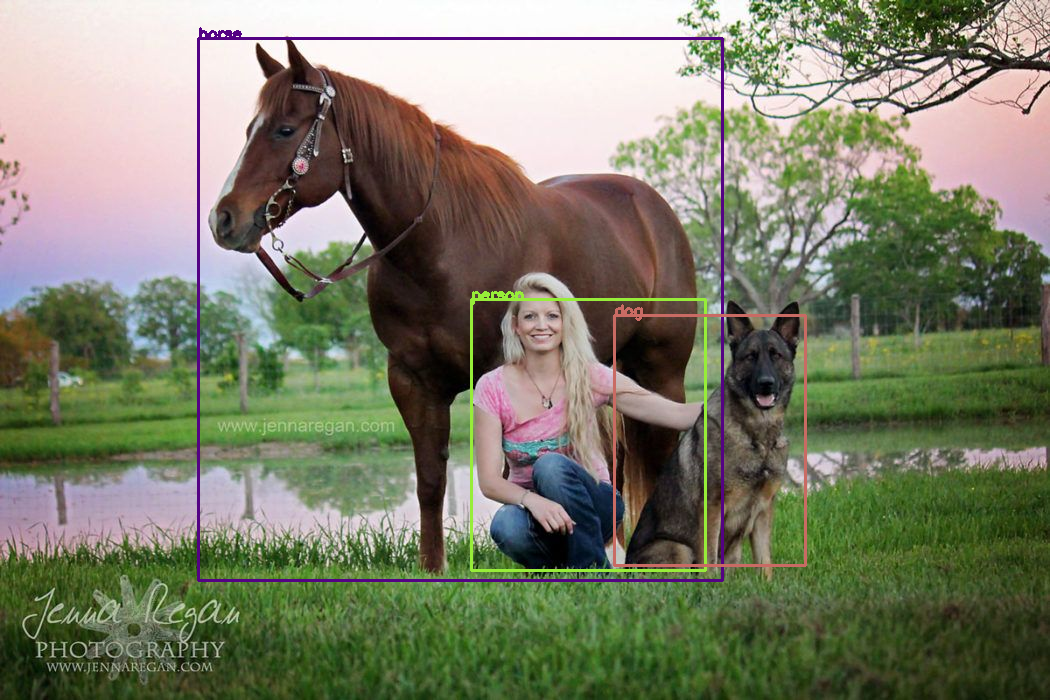

In [17]:
img = cv2.imread(f_path)

# 여러개의 중복 박스 중 한개를 골라준다. -> 데이터 타입 주의
# 컬러 -> 데이터 타입 주의
selected_box_idx = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
for bi, (x, y, w, h) in enumerate(boxes):
  if bi in selected_box_idx:
    #print(bi, x, y, w, h)
    class_id = class_ids[bi]
    color = colors[class_id]
    class_name = class_names[class_id]
    cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
    cv2.putText(img, class_name, (x,y), cv2.FONT_ITALIC, 0.5, color, 2)
cv2_imshow(img)

# *함수 생성*

In [19]:
img = cv2.imread(f_path)

name_file = '/content/SkillTreePython-DeepLearning/00.추가학습/data/coco.names'
with open(name_file, 'r') as f:
  class_names=[]
  for line in f.readlines():
    class_names.append(line.strip())  # .strip(): \n 제거

In [20]:
# 이미지를 넣으면 딕텍션 자동
def show_result(img):
  img_h, img_w, img_c = img.shape

  layer_indexes = model.getUnconnectedOutLayers()  # 아웃레이어의 인덱스
  layer_names = model.getLayerNames()  # 아웃레이어의 네임

  blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0,0,0), True, crop=False)
  model.setInput(blob)


  name = []
  for index in layer_indexes:
    name.append(layer_names[index[0]-1])

  preds = model.forward(name)

  boxes = []
  confidences = []
  class_ids = []
  for pred in preds:
    for v in pred:
      # box : 모델이 예측한 값
      box = v[:4]
      # confidence : 자신감
      confidence = v[4]
      # class_id : 클래스
      class_id = v[5:] 
      class_id = np.argmax(class_id)

      
      if confidence > 0.5:
        x_center, y_center, w, h = box
        x_center, w= int(x_center*img_w), int(w*img_w)
        y_center, h= int(y_center*img_h), int(h*img_h)
        x, y = x_center-int(w/2), y_center-int(h/2)
        

        boxes.append([x, y, w, h])
        confidences.append(float(confidence))
        class_ids.append(class_id)

  selected_box_idx = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
  for bi, (x, y, w, h) in enumerate(boxes):
    if bi in selected_box_idx:
      class_id = class_ids[bi]
      color = colors[class_id]
      class_name = class_names[class_id]
      cv2.rectangle(img, (x,y), (x+w,y+h), color, 2)
      cv2.putText(img, class_name, (x,y), cv2.FONT_ITALIC, 0.5, color, 2)
  IPython.display.clear_output(wait=True)
  cv2_imshow(img)

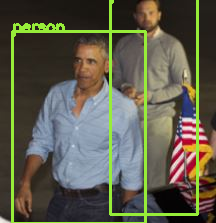

In [22]:
f_path = '/content/SkillTreePython-DeepLearning/00.추가학습/data/p2.JPG'
img = cv2.imread(f_path)

show_result(img)

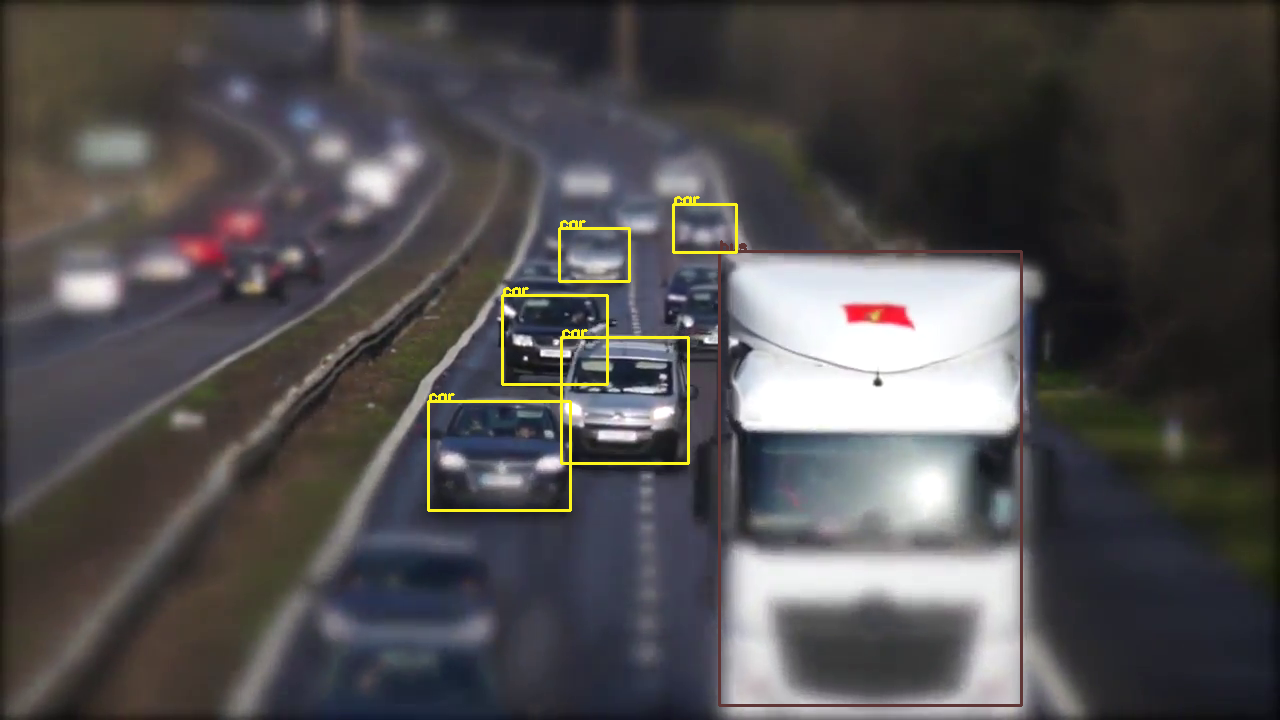

KeyboardInterrupt: ignored

In [23]:
cap = cv2.VideoCapture('/content/SkillTreePython-DeepLearning/car_video.mp4')
while True:
  _, frame = cap.read()
  if frame is None: break
  show_result(frame)

In [25]:
# 이미지 불러오기
f_path = '/content/car.jpg'
img = cv2.imread(f_path)
img_h, img_w, img_c = img.shape

In [26]:
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
model.setInput(blob)

predict_layer_names = [model.getLayerNames()[index[0] - 1] for index in model.getUnconnectedOutLayers()] 
preds_each_layers = model.forward(predict_layer_names) 

In [27]:
# 확실성이 0.5 이상인 개체인식 결과정보 추출 -> 좌표값(이미지 사이즈에 맞게), (확실성 값), (argmax한 클래스 결과정보)
boxes = []
confidences=[]
class_ids = []
for preds in preds_each_layers:
  for pred in preds:
    box, confidence, class_id = pred[:4], pred[4], np.argmax(pred[5:])
    if confidence > 0.5:
      x_center, y_center, w, h = box
      x_center, w = int(x_center*img_w), int(w*img_w)
      y_center, h = int(y_center*img_h), int(h*img_h)
      x, y = x_center-int(w/2), y_center-int(h/2)
      
      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

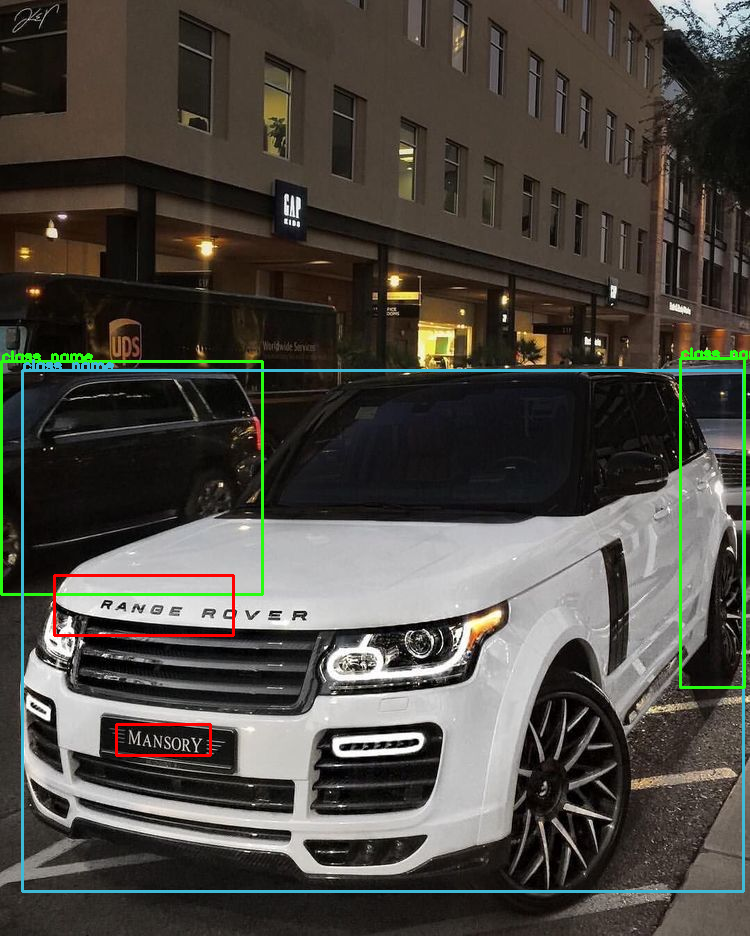

In [28]:
# 박스 그리기
selected_box_idx = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4) # 확실성이 0.5 이상인 박스들 중에서 중 한개를 골라서 몇번째 박스다 라고 알려줌 그래서 아웃풋이 index          0.4는 뭐더라


# 분류기 생성
carnum_model = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_russian_plate_number.xml')
carnum_model.load(cv2.samples.findFile(cv2.data.haarcascades +'haarcascade_russian_plate_number.xml')) # 파라미터를 객체에 로드

for bi, (x, y, w, h) in enumerate(boxes):
  if bi in selected_box_idx:             # NMSBoxes로 찾은 해당 번째의 박스일 경우의 클래스 정보로 해당 클래스의 색상및 이름을 바인딩
    class_id = class_ids[bi]
    color = class_colors[class_id]
    class_name = class_names[class_id]

    cv2.rectangle(img, (x, y), (x+w, y+h), color , 2)
    cv2.putText(img, 'class_name', (x, y), cv2.FONT_ITALIC, 0.5, color, 2)

    car = img[y:y+h, x:x+w]
    carnums_pred = carnum_model.detectMultiScale(car)
    for (x2, y2, w2, h2) in carnums_pred:                           
      cv2.rectangle(car, (x2, y2), (x2+w2, y2+h2), (0,0,255) , 2)


# IPython.display.clear_output(wait=True) 동여상일때 해당됨     출력결과 매번 지워줌
cv2_imshow(img)